In [230]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns


In [231]:
file = 'heart-dataset.csv'
df = pd.read_csv(file)

In [232]:
# Tampilkan DataFrame sebelum menghapus duplikat
print("DataFrame sebelum menghapus duplikat:")
print(df)

print("DataFrame setelah menghapus duplikat:")

# Hapus data duplikat berdasarkan seluruh kolom
hapus = df.drop_duplicates(inplace=True)
print(df)
# Tampilkan DataFrame setelah menghapus duplikat


DataFrame sebelum menghapus duplikat:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealt

In [233]:
df = df.reindex(columns=['HeartDiseaseorAttack', 'Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies', 'DiffWalk'])

In [234]:
names = {'HeartDiseaseorAttack':'sakitJantung', 'Sex':'kelamin', 'Age':'umur', 'BMI':'bmi', 'HighBP':'tekananDarah', 'HighChol':'kolesterol', 'Stroke':'stroke', 'Diabetes':'diabetes', 'Smoker':'rokok', 'HvyAlcoholConsump':'alkohol', 'PhysActivity':'olahraga', 'Fruits':'buah', 'Veggies':'sayur', 'DiffWalk':'susahJalan'}
df = df.rename(columns=names)

In [235]:
# replace umur start from 0
df['umur'] = df['umur'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0],
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]).astype(float)

In [236]:
cols = df.columns

for names in cols:
  print(names)
  unique_values = df[names].unique()
  print(unique_values)

sakitJantung
[0. 1.]
kelamin
[0. 1.]
umur
[ 8.  6. 10.  9.  7. 12.  3.  5.  1. 11.  4.  0.  2.]
bmi
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
tekananDarah
[1. 0.]
kolesterol
[1. 0.]
stroke
[0. 1.]
diabetes
[0. 2. 1.]
rokok
[1. 0.]
alkohol
[0. 1.]
olahraga
[0. 1.]
buah
[0. 1.]
sayur
[1. 0.]
susahJalan
[1. 0.]


#UJI COBA

In [237]:
df.shape

(229781, 14)

In [238]:
from imblearn.over_sampling import SMOTE
X = df.drop('sakitJantung', axis=1)
y = df['sakitJantung']
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [239]:
print("Distribusi kelas sebelum SMOTE:", Counter(y))
print("Distribusi kelas setelah SMOTE:", Counter(y_res))

Distribusi kelas sebelum SMOTE: Counter({0.0: 206064, 1.0: 23717})
Distribusi kelas setelah SMOTE: Counter({0.0: 206064, 1.0: 206064})


In [240]:
input_shape = (X_train.shape[1],)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=input_shape, activation='relu'),
  tf.keras.layers.Dropout(rate=0.1),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.05),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

c:\users\faisal\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.6763 - loss: 0.6032 - val_accuracy: 0.7468 - val_loss: 0.5176
Epoch 2/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7412 - loss: 0.5243 - val_accuracy: 0.7510 - val_loss: 0.5115
Epoch 3/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7466 - loss: 0.5173 - val_accuracy: 0.7539 - val_loss: 0.5093
Epoch 4/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7496 - loss: 0.5128 - val_accuracy: 0.7555 - val_loss: 0.5061
Epoch 5/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7517 - loss: 0.5111 - val_accuracy: 0.7571 - val_loss: 0.5059
Epoch 6/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7560 - loss: 0.5068 - val_accuracy: 0.7578 - val_loss: 0.5049
Epoch 7/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7574 - loss: 0.5031 - val_accuracy: 0.7602 - val_loss: 0.4996
Epoch 8/100
8243/8243 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7582 -

In [241]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


2576/2576 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7748 - loss: 0.4674
Test Loss: 0.4677618741989136, Test Accuracy: 0.7751559019088745


In [247]:
from sklearn.metrics import confusion_matrix, recall_score

# Prediksi label pada data uji
y_pre = model.predict(X_test)
y_pred = (y_pre > 0.5).astype(int)

print(y_pred)

2576/2576 ━━━━━━━━━━━━━━━━━━━━ 3s 997us/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


C:\Users\faisal\AppData\Local\Temp\ipykernel_10012\673717880.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels([' No Heart disease', 'Heart Disease'])


[Text(0, 0, ' No Heart disease'), Text(1, 0, 'Heart Disease')]

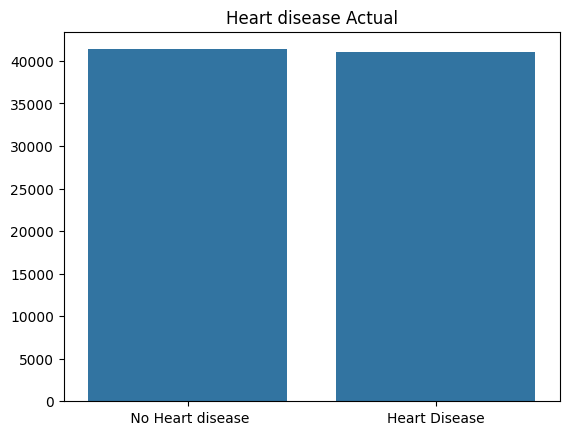

In [248]:
unique, counts = np.unique(y_test, return_counts=True)
f = sns.barplot(x=unique, y=counts)
f.set_title("Actual Heart")
f.set_title("Heart disease Actual")
f.set_xticklabels([' No Heart disease', 'Heart Disease'])


C:\Users\faisal\AppData\Local\Temp\ipykernel_10012\2530541406.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(['No Heart disease', 'Heart Disease'])


[Text(0, 0, 'No Heart disease'), Text(1, 0, 'Heart Disease')]

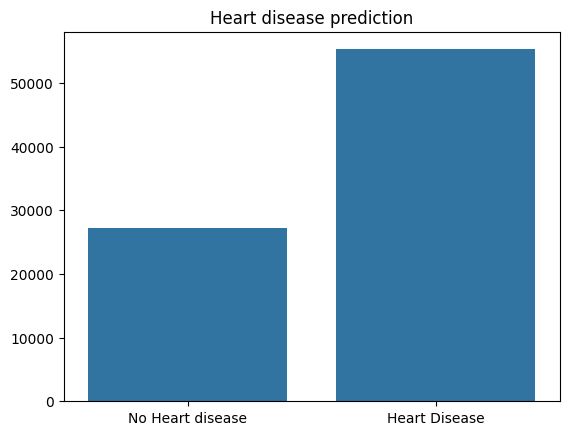

In [254]:
unique, counts = np.unique(y_pred, return_counts=True)
f = sns.barplot(x=unique, y=counts)
f.set_title("Predicted distribution")
f.set_title("Heart disease prediction")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])


In [253]:
y_test.shape

(82426,)

In [252]:
y_pred.shape

(82426, 1)

In [255]:
conf_matrix = confusion_matrix(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)

Confusion Matrix:
[[24987 16371]
 [ 2162 38906]]

Recall Score: 0.9473556053374891


In [259]:
data_list = [[1.0, 4.0, 26.2, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]]


data_array = np.array(data_list)

baru = model.predict(data_array)
print(baru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.9287226]]


In [202]:
df.head()

,sakitJantung,kelamin,umur,bmi,tekananDarah,kolesterol,stroke,diabetes,rokok,alkohol,olahraga,buah,sayur,susahJalan
0,0.0,0.0,8.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,6.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,8.0,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,10.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,10.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
